In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt



/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [64]:
#условие размера графиков
sns.set(rc={'figure.figsize':(12,4)}, style="whitegrid")

In [15]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/groups.csv', sep=';') #- файл с информацией 
#о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)
 

In [16]:
groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/group_add.csv') #дополнительный файл
#с пользователями, который вам прислали спустя 2 дня после передачи данных

In [17]:
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/active_studs.csv') #файл с 
#информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.

In [18]:
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-chernov-36/Data_fp/checks.csv', sep=';') #файл с информацией об 
#оплатах пользователей в дни проведения эксперимента. 

In [7]:
groups

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [8]:
groups_add

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [9]:
active_studs

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [10]:
checks

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [36]:
concatenated_df = [groups] #создаем список из датафреймов где уже есть groups чтобы туда добавлялись новые добавочные файлы 

In [46]:
def add_files(df_add):
    try:
        groups.columns = df_add.columns #унифицируем заголовки по groups
        concatenated_df.append(df_add) #будем постоянно добавлять новый датасет в список 
        groups_all = concat_datasets(concatenated_df) #объединяем все датафреймы из списка
        groups_all = groups_all.drop_duplicates(subset='id') # удаляем дубликаты
        active_studs.rename(columns={active_studs.columns[0]: groups_all.columns[0]}, inplace=True) #переименовываем заголовок датасета active_studs  по которому будем мерджить при необходимости 
        checks.rename(columns={checks.columns[0]: groups_all.columns[0]}, inplace=True) #переименовываем заголовок датасета checks  по которому  будем мерджить
        checks_group = pd.merge(checks, groups_all, how='inner', on='id') # объединяем датасеты checks и groups_all
        std_checks_group = checks_group.groupby('grp').rev.std() #находим стандартное отклонение, по желанию можно лубую метрику посчитать
        return std_checks_group
    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")
        return None
    

In [60]:
add_files(groups_add)


grp
A    815.893445
B    741.834304
Name: rev, dtype: float64

In [69]:
def add_grafics(df_add):
    try:
        groups.columns = df_add.columns #унифицируем заголовки по groups
        concatenated_df.append(df_add) #будем постоянно добавлять новый датафрейм в список concatenated_df
        groups_all = concat_datasets(concatenated_df) #объединяем все датафреймы из списка concatenated_df
        groups_all = groups_all.drop_duplicates(subset='id') # удаляем дубликаты
        active_studs.rename(columns={active_studs.columns[0]: groups_all.columns[0]}, inplace=True) #переименовываем заголовок датасета active_studs  по которому будем мерджить при необходимости 
        checks.rename(columns={checks.columns[0]: groups_all.columns[0]}, inplace=True) #переименовываем заголовок датасета checks  по которому  будем мерджить
        checks_group = pd.merge(checks, groups_all, how='inner', on='id') # объединяем датасеты checks и groups_all
        checks_group['rev_log'] = np.log(checks_group['rev']) #логарифмируем колонку rev
        
        hplot_grp_A = checks_group.query("grp == 'A'").rev_log # создаем переменную значения rev_log по группе А
        hplot_grp_B = checks_group.query("grp == 'B'").rev_log # создаем переменную значения rev_log по группе В
        
        plt.subplot(131)
        plt.hist(hplot_grp_A, bins=10, color='blue', alpha=0.5)
        plt.title('Distribution Group A')

        plt.subplot(132)
        plt.hist(hplot_grp_B, bins=10, color='green', alpha=0.5)
        plt.title('Distribution Group B')

        return
    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")
        return None

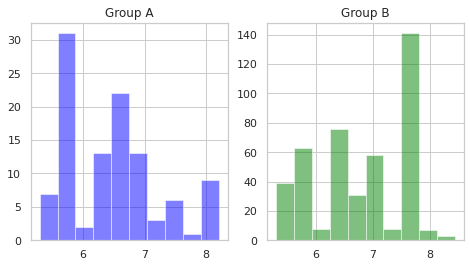

In [70]:
add_grafics(groups_add)